In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
pd.set_option("display.width", 400)       # Cho phép bảng dài theo chiều ngang

print(train_data)
# print(test_data.head(5))

          id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside Drained_after_socializing  Friends_circle_size  Post_frequency Personality
0          0               0.0         No                      6.0            4.0                        No                 15.0             5.0   Extrovert
1          1               1.0         No                      7.0            3.0                        No                 10.0             8.0   Extrovert
2          2               6.0        Yes                      1.0            0.0                       NaN                  3.0             0.0   Introvert
3          3               3.0         No                      7.0            3.0                        No                 11.0             5.0   Extrovert
4          4               1.0         No                      4.0            4.0                        No                 13.0             NaN   Extrovert
...      ...               ...        ...                 

In [36]:
train_data.isna().sum()
# test_data.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

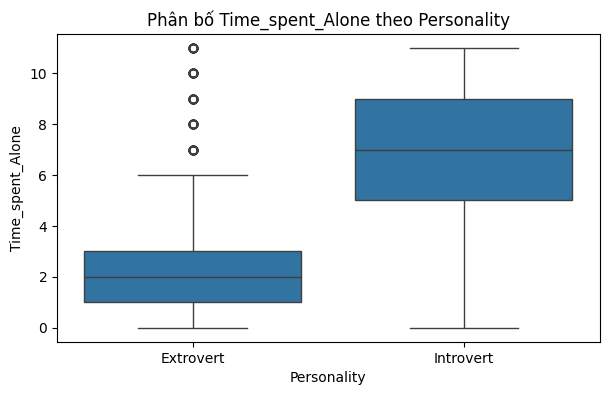

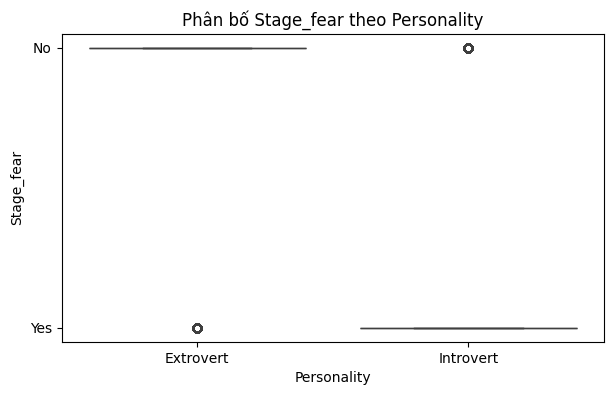

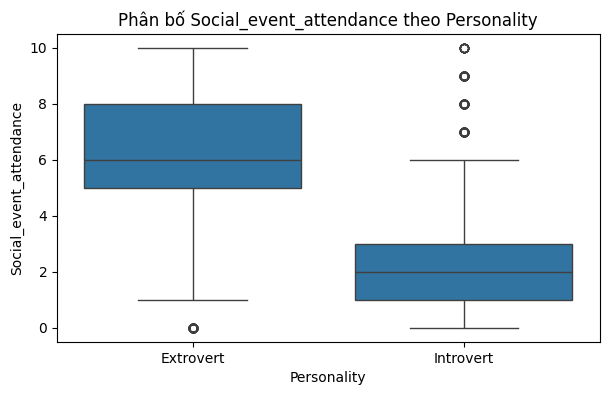

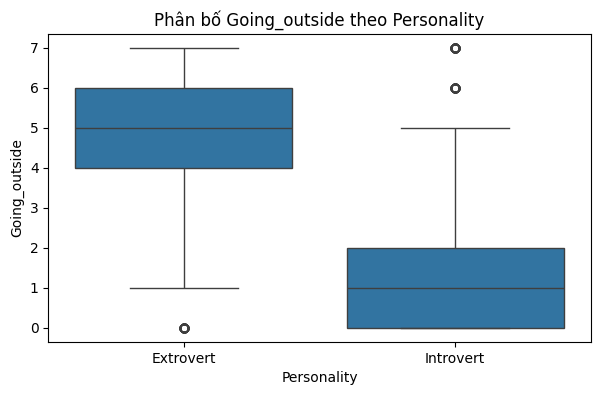

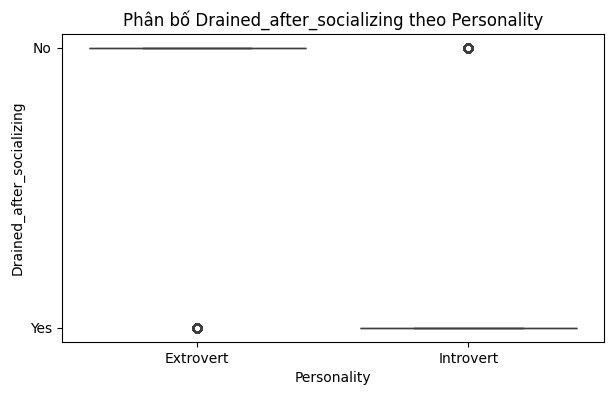

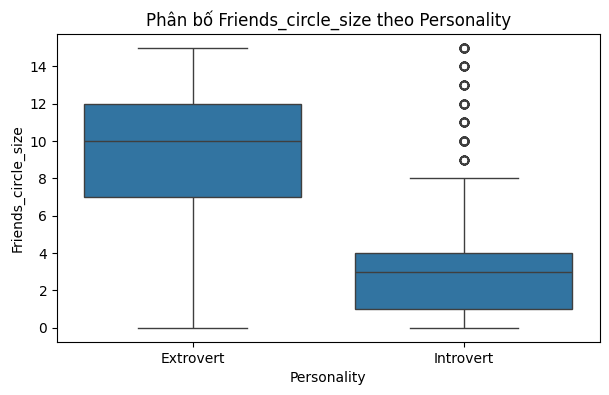

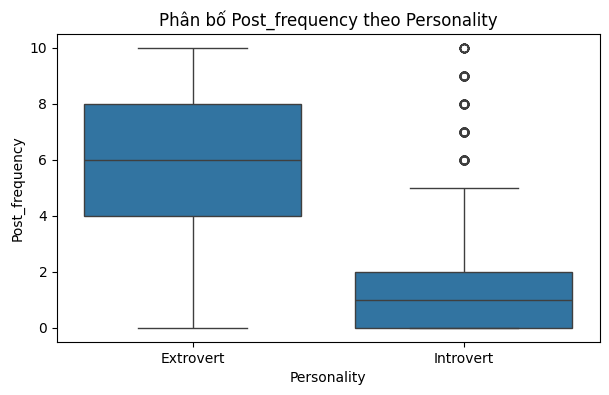

In [37]:
features = [
    "Time_spent_Alone", "Stage_fear", "Social_event_attendance",
    "Going_outside", "Drained_after_socializing",
    "Friends_circle_size", "Post_frequency"
]

for col in features:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=train_data, x="Personality", y=col)
    plt.title(f"Phân bố {col} theo Personality")
    plt.show()

In [38]:
mask_intro = (train_data['Personality'] == "Introvert") & (train_data['Time_spent_Alone'].isna())
train_data.loc[mask_intro, 'Time_spent_Alone'] = np.random.randint(4, 9, size=mask_intro.sum())

mask_extro = (train_data['Personality'] == "Extrovert") & (train_data['Time_spent_Alone'].isna())
train_data.loc[mask_extro, 'Time_spent_Alone'] = np.random.randint(0, 4, size=mask_extro.sum())



In [39]:
train_data.isna().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [40]:
train_data.loc[(train_data['Personality'] == "Introvert") & (train_data['Stage_fear'].isna()), 'Stage_fear'] = "Yes"

# Extrovert -> No
train_data.loc[(train_data['Personality'] == "Extrovert") & (train_data['Stage_fear'].isna()), 'Stage_fear'] = "No"

In [41]:
mask_intro = (train_data['Personality'] == "Introvert") & (train_data['Social_event_attendance'].isna())
train_data.loc[mask_intro, 'Social_event_attendance'] = np.random.randint(1, 4, size=mask_intro.sum())

mask_extro = (train_data['Personality'] == "Extrovert") & (train_data['Social_event_attendance'].isna())
train_data.loc[mask_extro, 'Social_event_attendance'] = np.random.randint(5, 9, size=mask_extro.sum())

In [42]:
mask_intro = (train_data['Personality'] == "Introvert") & (train_data['Going_outside'].isna())
train_data.loc[mask_intro, 'Going_outside'] = np.random.randint(0, 3, size=mask_intro.sum())

mask_extro = (train_data['Personality'] == "Extrovert") & (train_data['Going_outside'].isna())
train_data.loc[mask_extro, 'Going_outside'] = np.random.randint(4, 7, size=mask_extro.sum())

In [43]:
train_data.loc[(train_data['Personality'] == "Introvert") & (train_data['Drained_after_socializing'].isna()), 'Drained_after_socializing'] = "No"

# Extrovert -> No
train_data.loc[(train_data['Personality'] == "Extrovert") & (train_data['Drained_after_socializing'].isna()), 'Drained_after_socializing'] = "Yes"

In [44]:
mask_intro = (train_data['Personality'] == "Introvert") & (train_data['Friends_circle_size'].isna())
train_data.loc[mask_intro, 'Friends_circle_size'] = np.random.randint(1, 5, size=mask_intro.sum())

mask_extro = (train_data['Personality'] == "Extrovert") & (train_data['Friends_circle_size'].isna())
train_data.loc[mask_extro, 'Friends_circle_size'] = np.random.randint(6, 13, size=mask_extro.sum())

In [45]:
mask_intro = (train_data['Personality'] == "Introvert") & (train_data['Post_frequency'].isna())
train_data.loc[mask_intro, 'Post_frequency'] = np.random.randint(0, 3, size=mask_intro.sum())

mask_extro = (train_data['Personality'] == "Extrovert") & (train_data['Post_frequency'].isna())
train_data.loc[mask_extro, 'Post_frequency'] = np.random.randint(4, 9, size=mask_extro.sum())

In [46]:
test_data.isna().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [ ]:
na_mask = test_data['Time_spent_Alone'].isna()
test_data.loc[na_mask, 'Time_spent_Alone'] = np.random.choice(
    test_data['Time_spent_Alone'].dropna(),
    size=na_mask.sum(),
    replace=True
)
tna_mask = test_data['Stage_fear'].isna()
test_data.loc[tna_mask, 'Stage_fear'] = np.random.choice(
    test_data['Stage_fear'].dropna(),
    size=tna_mask.sum(),
    replace=True
)
sna_mask = test_data['Social_event_attendance'].isna()
test_data.loc[sna_mask, 'Social_event_attendance'] = np.random.choice(
    test_data['Social_event_attendance'].dropna(),
    size=sna_mask.sum(),
    replace=True
)
test_data['Going_outside'] = test_data['Going_outside'].fillna(test_data['Going_outside'].median())


dna_mask = test_data['Drained_after_socializing'].isna()
test_data.loc[dna_mask, 'Drained_after_socializing'] = np.random.choice(
    test_data['Drained_after_socializing'].dropna(),
    size=dna_mask.sum(),
    replace=True
)

fna_mask = test_data['Friends_circle_size'].isna()
test_data.loc[fna_mask, 'Friends_circle_size'] = np.random.choice(
    test_data['Friends_circle_size'].dropna(),
    size=fna_mask.sum(),
    replace=True
)
test_data['Post_frequency'] = test_data['Post_frequency'].fillna(test_data['Post_frequency'].median())

In [48]:
train_data = train_data.applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))
test_data  = test_data.applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))

C:\Users\pc\AppData\Local\Temp\ipykernel_8284\3748366574.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))
C:\Users\pc\AppData\Local\Temp\ipykernel_8284\3748366574.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data  = test_data.applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))


In [49]:
train_data['Drained_after_socializing']

0        0
1        0
2        0
3        0
4        0
        ..
18519    0
18520    0
18521    1
18522    1
18523    0
Name: Drained_after_socializing, Length: 18524, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X = train_data.drop(["id","Personality"],axis=1)
Y = train_data['Personality'].map({"Introvert": 0, "Extrovert": 1})

x_train, x_val , y_train , y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Mô hình hồi quy Logistic
log_reg = LogisticRegression(random_state=42)

# Mô hình cây quyết định
dt_clf = DecisionTreeClassifier(random_state=42)

# Mô hình rừng ngẫu nhiên
rf_clf = RandomForestClassifier(random_state=42)


In [52]:
log_reg.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# đánh giá các mô hình


In [54]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf
}

for name, model in models.items():
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.97
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.96


In [55]:
best_model = log_reg
y_pred = best_model.predict(x_val)
print(y_pred[:5])
print(y_val[:5])



[1 0 1 1 1]
3095     1
14589    0
10565    1
17053    1
9145     1
Name: Personality, dtype: int64


In [56]:
X_test = test_data.drop("id",axis=1)
y_test_pred = best_model.predict(X_test)
personality_map = {0: "Introvert", 1: "Extrovert"}
y_test_labels = [personality_map[val] for val in y_test_pred]

# Tạo DataFrame kết quả
submission = pd.DataFrame({
    "id": test_data["id"],
    "Personality": y_test_labels
})

print(submission.head())

# Xuất file CSV
submission.to_csv("submission.csv", index=False, encoding="utf-8-sig")
print("✅ File submission.csv đã được tạo (có nhãn Introvert/Extrovert).")

      id Personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Introvert
✅ File submission.csv đã được tạo (có nhãn Introvert/Extrovert).
